# **Working with Time Series in Python**

## **Loading Relevent Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import scipy.stats as st
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

data = pd.read_csv("data/IndexE8.csv")
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
data.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

## **Pre-Process the Data**

In [4]:
data['date'] = pd.to_datetime(data.date, dayfirst=True)
data.set_index('date', inplace=True)
data.index.name = None

# **White Noise**

- White Noise is a special type of time series, where the data doesn't follow a pattern.
- White Noise is unpredictible
- White Noise is a sequence of random data, where every value has a time-period associated with it.
- A white noise process is a serially uncorrelated stochastic process with a mean of zero and a constant and finite variance.

In [5]:
wn = np.random.normal(loc=data.spx.mean(), scale=data.spx.std(), size=len(data))
data['wn'] = wn
data.wn.describe()

count    6269.000000
mean     1284.475033
std       482.513095
min      -619.774892
25%       960.508631
50%      1282.599027
75%      1605.187377
max      3068.473268
Name: wn, dtype: float64

Text(0.5, 1.0, 'White Noise vs S&P')

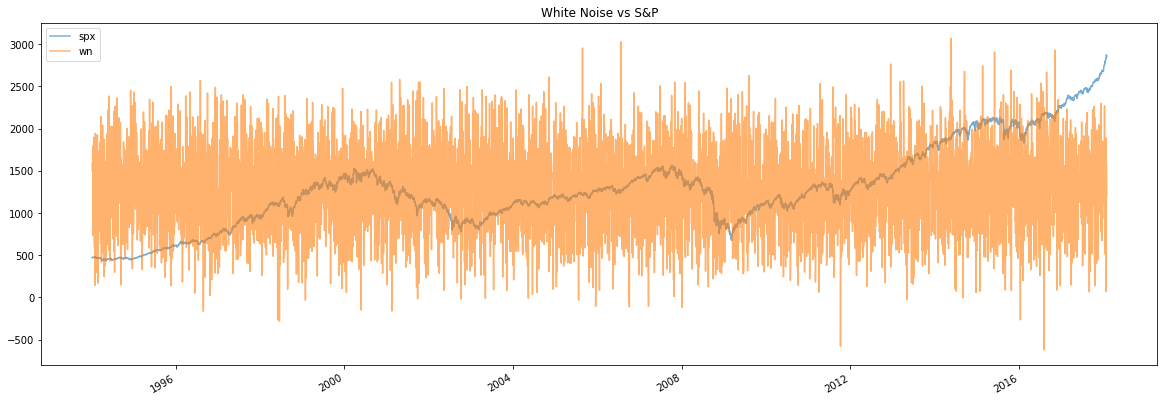

In [6]:
data[['spx', 'wn']].plot(figsize=(20, 7), alpha=0.6)
plt.title('White Noise vs S&P')

# **Random Walk**

- Random Walk is a special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.

In [7]:
rw = pd.read_csv('data/RandWalk.csv')
rw['date'] = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw.index.name = None

In [8]:
data['rw'] = rw.price

Text(0.5, 1.0, 'Random Walk vs S&P')

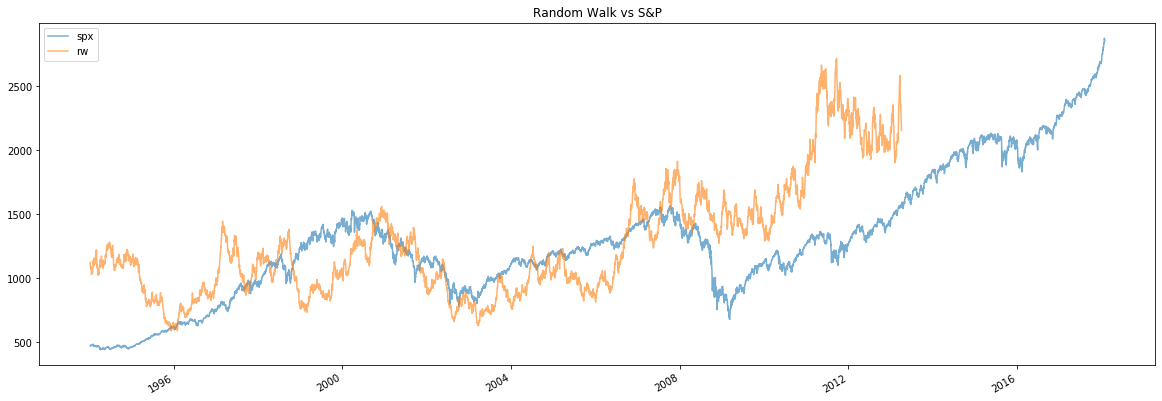

In [9]:
data[['spx', 'rw']].plot(figsize=(20, 7), alpha=0.6)
plt.title('Random Walk vs S&P')

- Both time-series have small variations between consecutive time periods.
- Cyclical increases and decreases in short periods of time.

In general, if a time serie resemble a random walk the prices can't be predicted with great accuracy. If Future prices can be predicted with great accuracy, then, there are arbitrage opportunities.

# **Stationarity**

stationarity means that the statistical properties of the process do not change over time. However, several different notions of stationarity have been suggested in econometric literature over the years.

In [10]:
data.dropna(inplace=True)

## **the Dickey-Fuller Test**

In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

In [11]:
sts.adfuller(data.rw)

(-1.3205195271613455,
 0.6197331071145715,
 24,
 4992,
 {'1%': -3.4316606301617867,
  '5%': -2.862119156603323,
  '10%': -2.56707828579734},
 46258.583249579635)

- adf `-1.3205195271613455`: the test statistic
- pvalue `0.6197331071145715`
- uselag `24`: the number of lag used
- nobs `4992` The number of observations used for the ADF regression and calculation of the critical values.
- `{'1%': -3.4316606301617867, '5%': -2.862119156603323, '10%': -2.56707828579734}` critical values for the test statistics at 1%, 5%, and 10% levels.

In [12]:
print(f'Dickey-Fuller Test (S&P):\n{sts.adfuller(data.spx)}\n')
print(f'Dickey-Fuller Test (Random Walk):\n{sts.adfuller(data.rw)}\n')
print(f'Dickey-Fuller Test (White Noise):\n{sts.adfuller(data.wn)}')

Dickey-Fuller Test (S&P):
(-1.734932613424833, 0.4132099217513119, 18, 4998, {'1%': -3.431659055967043, '5%': -2.862118461132801, '10%': -2.5670779155711902}, 39877.266851629094)

Dickey-Fuller Test (Random Walk):
(-1.3205195271613455, 0.6197331071145715, 24, 4992, {'1%': -3.4316606301617867, '5%': -2.862119156603323, '10%': -2.56707828579734}, 46258.583249579635)

Dickey-Fuller Test (White Noise):
(-69.51463848547921, 0.0, 0, 5016, {'1%': -3.431654355990492, '5%': -2.862116384706994, '10%': -2.5670768102089263}, 75674.43269549483)


# **Seasonality**

In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation, and holidays and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.

In [13]:
data = data.asfreq('b').fillna(method='ffill')

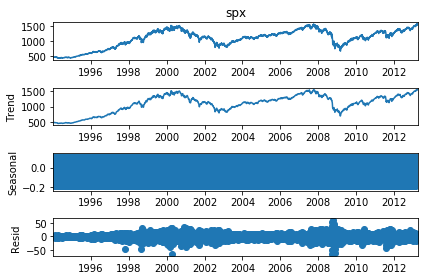

In [14]:
s_dec_additive = seasonal_decompose(data.spx, model="additive")
s_dec_additive.plot();

To test for seasonality we can use decomposition:
- Split into 3 effects:
    - Trend -> Pattern
    - Seasonal -> Cyclical effects
    - Residual -> Error of prediction
- Naive decomposition: We assume a linear relationship between the three parts and the observed time series.
    - Additive decomposition: observed = trend + seasonal + residual
    - Multiplicative decompostion: observed = trend * seasonal * residual

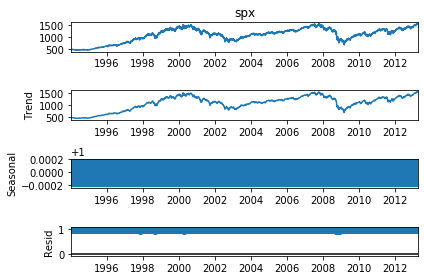

In [15]:
s_dec_multplicative = seasonal_decompose(data.spx, model="multplicative")
s_dec_multplicative.plot();

# **AutoCorrelation Function (ACF)**
- Correlation measures the similarity in the change of values of two series. But in Time Series data we have only one variable so we use AutoCorrelation.

- Autocorrelation is a type of serial dependence. Specifically, autocorrelation is when a time series is linearly related to a lagged version of itself. By contrast, correlation is simply when two independent variables are linearly related.

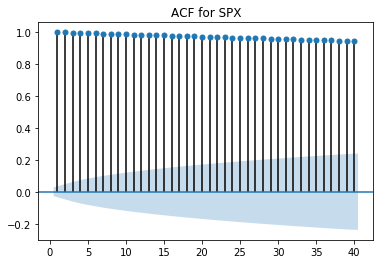

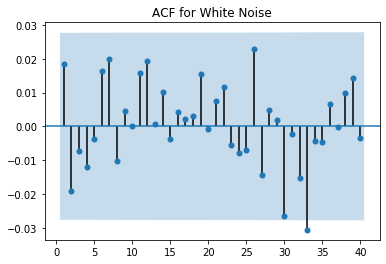

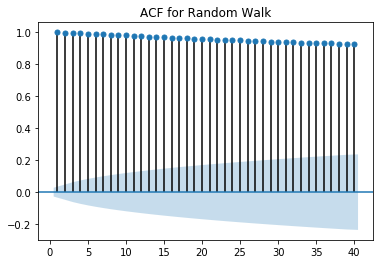

In [16]:
sgt.plot_acf(data.spx, lags=40, zero=False)
plt.title("ACF for SPX");

sgt.plot_acf(data.wn, lags=40, zero=False)
plt.title("ACF for White Noise");

sgt.plot_acf(data.rw, lags=40, zero=False)
plt.title("ACF for Random Walk");

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.

# **Partial AutoCorrelation Function (PACF)**

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

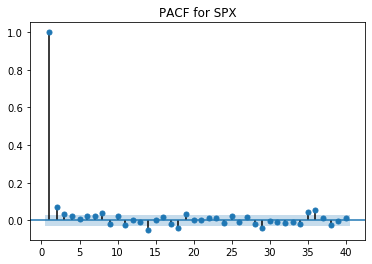

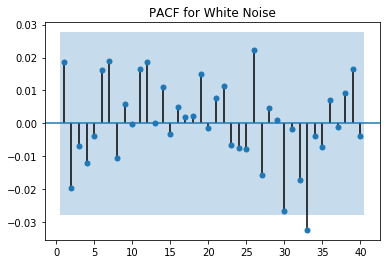

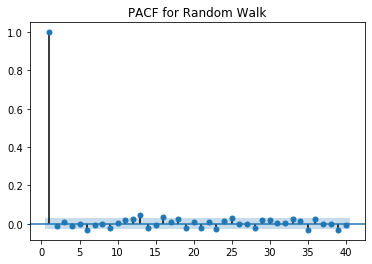

In [17]:
sgt.plot_pacf(data.spx, lags=40, zero=False, method=('ols'))
plt.title("PACF for SPX");

sgt.plot_pacf(data.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF for White Noise");

sgt.plot_pacf(data.rw, lags=40, zero=False, method=('ols'))
plt.title("PACF for Random Walk");